In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2

from PIL import Image
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import plot_model

Using TensorFlow backend.
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

In [2]:
# Initializing some variables

images = []
classes = []

n_classes = 43 # there are 43 classes in the dataset

In [3]:
def load_images_from_folder(folder, i):
    ''' This function takes folder path, folder number and stores all the images from folders, folder name(i)
    into images, classes variables'''
    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = Image.fromarray(img, 'RGB')
        new_img = img.resize((30, 30))
        #print(np.array(img))
        images.append(np.array(new_img))
        classes.append(i)
    

In [4]:
for i in tqdm(range(n_classes)):
    folder = 'train/{0}/'.format(i)
    load_images_from_folder(folder, i)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [03:18<00:00,  2.61s/it]


In [5]:
print(len(classes))
print(len(images))

39209
39209


In [6]:
# Converting classes, images into numpy array

classes = np.array(classes)
print(type(classes))

images = np.array(images)
print(type(images))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
#Splitting the data into Train and Validation sets

x_train, x_val, y_train, y_val = train_test_split(images, classes, test_size=0.2, stratify=classes)

In [8]:
print('Training data shape: ', x_train.shape, y_train.shape)
print('Validation data shape: ', x_val.shape, y_val.shape)

Training data shape:  (31367, 30, 30, 3) (31367,)
Validation data shape:  (7842, 30, 30, 3) (7842,)


In [9]:
# Converting y_train and y_val to One-Hot Encoder Vectors

encoder = OneHotEncoder(handle_unknown='ignore')

y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_val = encoder.transform(y_val.reshape(-1, 1))

print("y_train, y_val shapes after One-Hot encoding")
print('y_train: ', y_train.shape)
print('y_val: ', y_val.shape)

y_train, y_val shapes after One-Hot encoding
y_train:  (31367, 43)
y_val:  (7842, 43)


# Training the Model

In [10]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(x_train[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(43, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

In [12]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val), verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 31367 samples, validate on 7842 samples
Epoch 1/10
 - 37s - loss: 0.0748 - acc: 0.9831 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 2/10
 - 36s - loss: 0.0203 - acc: 0.9932 - val_loss: 0.0233 - val_acc: 0.9927
Epoch 3/10
 - 35s - loss: 0.0153 - acc: 0.9952 - val_loss: 0.0128 - val_acc: 0.9962
Epoch 4/10
 - 36s - loss: 0.0142 - acc: 0.9958 - val_loss: 0.0109 - val_acc: 0.9972
Epoch 5/10
 - 35s - loss: 0.0135 - acc: 0.9963 - val_loss: 0.0116 - val_acc: 0.9972
Epoch 6/10
 - 36s - loss: 0.0140 - acc: 0.9964 - val_loss: 0.0109 - val_acc: 0.9967
Epoch 7/10
 - 36s - loss: 0.0137 - acc: 0.9967 - val_loss: 0.0129 - val_acc: 0.9969
Epoch 8/10
 - 36s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0099 - val_acc: 0.9980
Epoch 9/10
 - 37s - loss: 0.0144 - acc: 0.9969 - val_loss: 0.0129 - val_acc: 0.9980
Epoch 10/10
 - 36s - loss: 0.0145 - acc: 0.9970 - val_loss: 0.0137 - val_acc: 0.9975


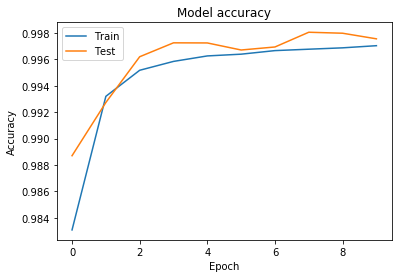

In [13]:
# Reference https://keras.io/visualization/

# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


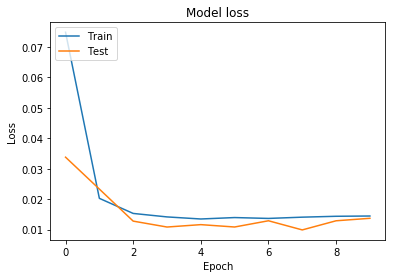

In [14]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
# Saving the model

model.save('classifier.h5')

# Testing the Model with Test.csv

In [16]:
test = pd.read_csv('test.csv')
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [17]:
classId = test['ClassId'].values
path = test['Path'].as_matrix()
test_images = []

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [20]:
for filename in tqdm(path):
    img = cv2.imread(os.path.join('',filename))
    img = Image.fromarray(img, 'RGB')
    new_img = img.resize((30, 30))
    test_images.append(np.array(new_img))

100%|███████████████████████████████████████████████████████████████████████████| 12630/12630 [01:15<00:00, 167.88it/s]


In [21]:
# Converting test_images into numpy array
test_images = np.array(test_images)
test_images.shape

(12630, 30, 30, 3)

In [22]:
# Making Predictions

pred = model.predict_classes(test_images)

In [26]:
print("Accuracy on Test data is:", accuracy_score(classId, pred))

Accuracy on Test data is: 0.9057007125890736
